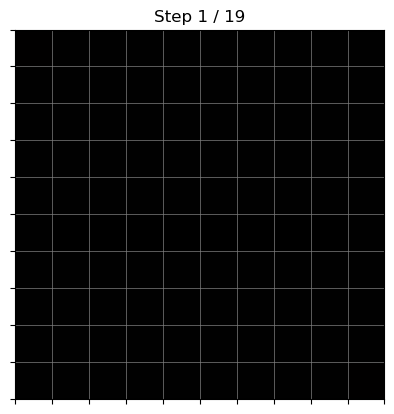

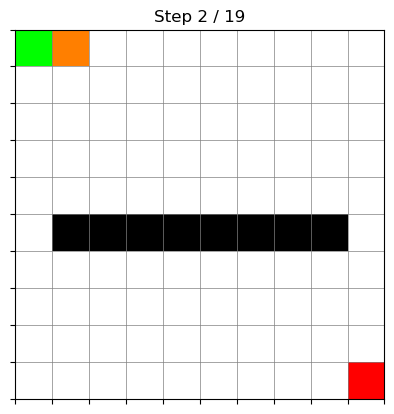

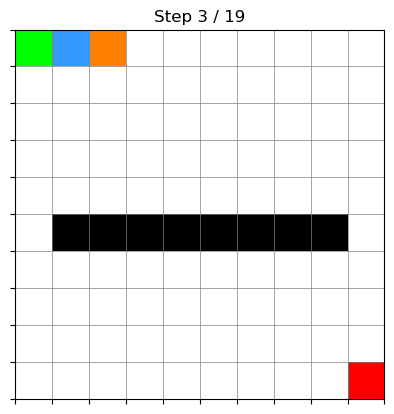

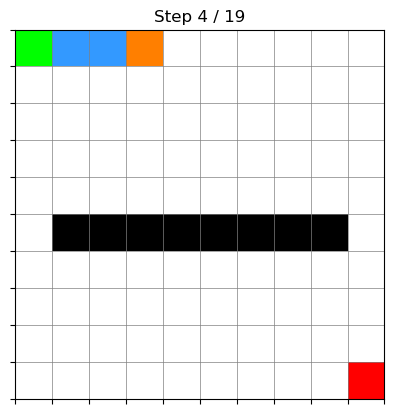

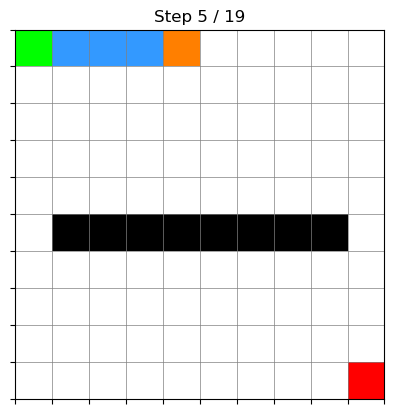

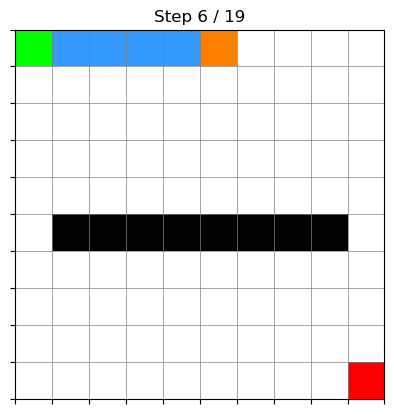

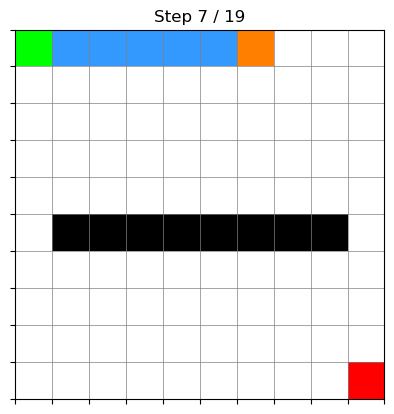

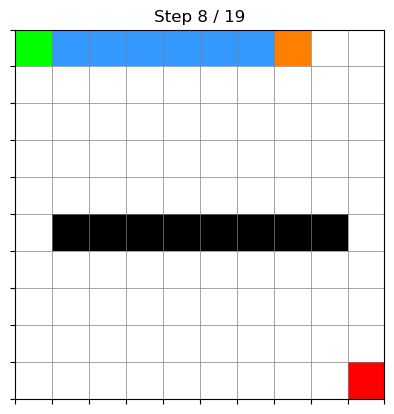

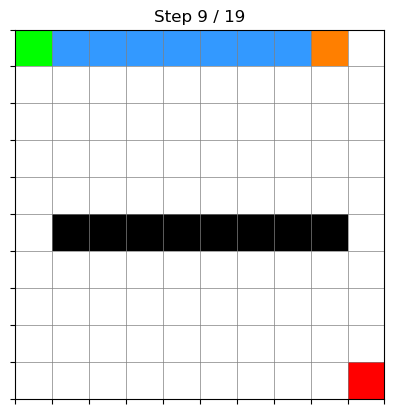

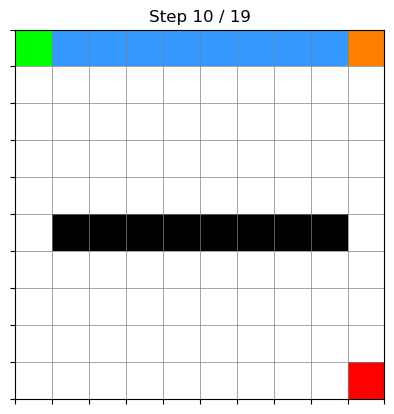

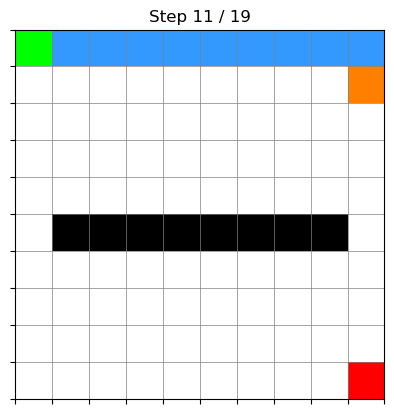

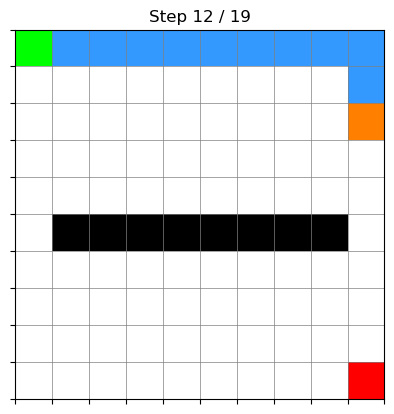

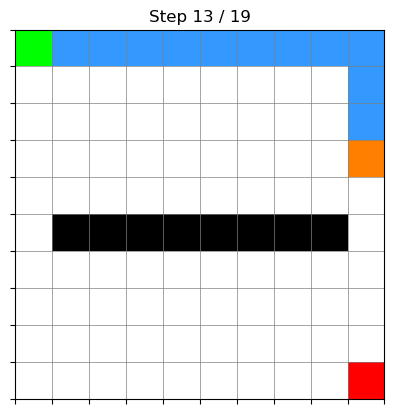

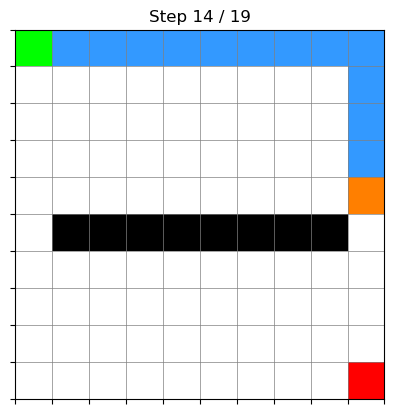

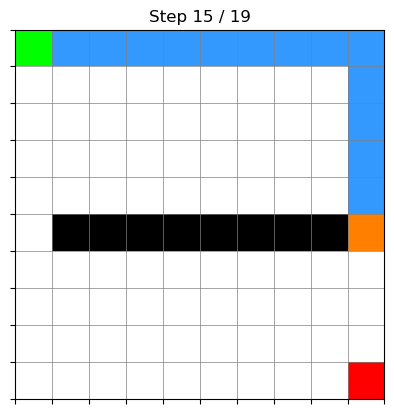

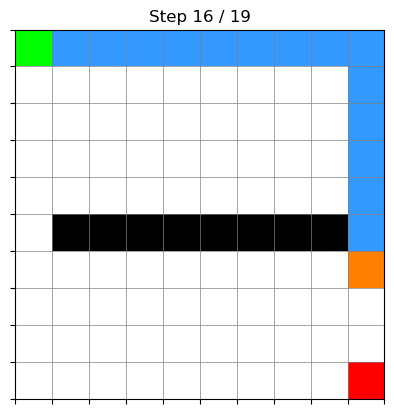

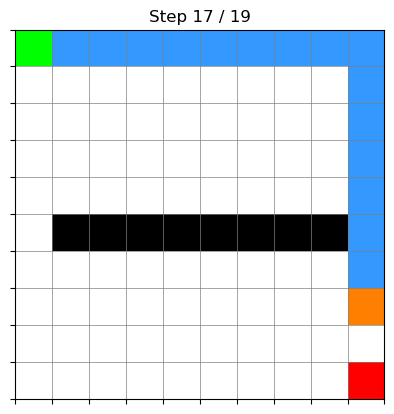

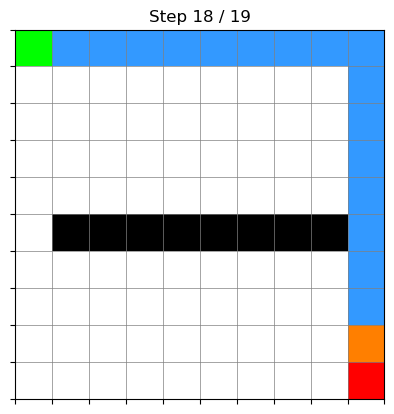

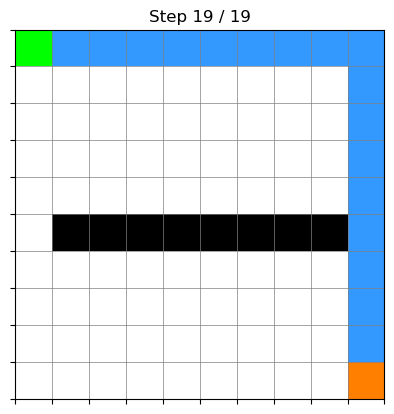

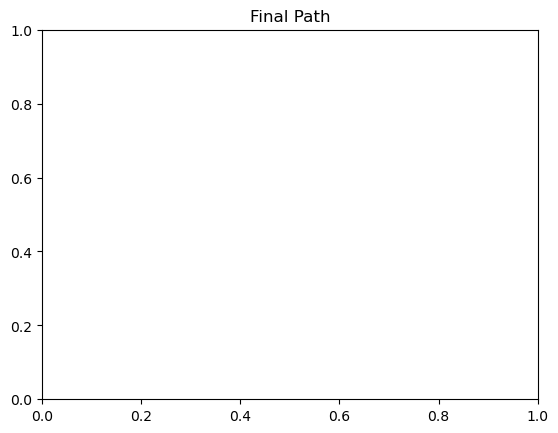

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

# Parameters
GRID_SIZE = 10
START = (0, 0)
GOAL = (9, 9)
OBSTACLES = [(5, i) for i in range(1, 9)]  # A wall in the middle

# Create grid
def create_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
    for ox, oy in OBSTACLES:
        grid[ox, oy] = -1  # Obstacles marked with -1
    return grid

# A* algorithm
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal):
    frontier = [(0, start)]
    came_from = {start: None}
    cost_so_far = {start: 0}

    while frontier:
        _, current = heapq.heappop(frontier)
        if current == goal:
            break

        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = current[0] + dx, current[1] + dy
            next_pos = (nx, ny)

            if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and grid[nx, ny] != -1:
                new_cost = cost_so_far[current] + 1
                if next_pos not in cost_so_far or new_cost < cost_so_far[next_pos]:
                    cost_so_far[next_pos] = new_cost
                    priority = new_cost + heuristic(goal, next_pos)
                    heapq.heappush(frontier, (priority, next_pos))
                    came_from[next_pos] = current

    return reconstruct_path(came_from, start, goal)

# Reconstruct path
def reconstruct_path(came_from, start, goal):
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from.get(current)
        if current is None: return []
    path.append(start)
    path.reverse()
    return path

# Visualization
def visualize(grid, path):
    cmap = {
        -1: (0, 0, 0),      # Obstacle - black
         0: (1, 1, 1),      # Empty - white
         1: (0.2, 0.6, 1),  # Path - blue
         2: (1, 0.5, 0),    # Agent - orange
         3: (0, 1, 0),      # Start - green
         4: (1, 0, 0),      # Goal - red
    }

    # Prepare color grid
    color_grid = np.zeros((GRID_SIZE, GRID_SIZE, 3))
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            value = grid[x, y]
            color_grid[x, y] = cmap[value]

    # Mark start and goal
    grid[START] = 3
    grid[GOAL] = 4

    for step, pos in enumerate(path):
        x, y = pos
        if pos != START and pos != GOAL:
            grid[x, y] = 1  # path
        color_grid = np.array([[cmap[grid[i, j]] for j in range(GRID_SIZE)] for i in range(GRID_SIZE)])

        # Highlight current agent position
        ax = plt.gca()
        color_grid[x, y] = cmap[2]  # agent position in orange

        plt.clf()
        plt.imshow(color_grid, interpolation='none')
        plt.grid(visible=True, color='gray', linewidth=0.5)
        plt.xticks(np.arange(-.5, GRID_SIZE, 1), [])
        plt.yticks(np.arange(-.5, GRID_SIZE, 1), [])
        plt.title(f"Step {step+1} / {len(path)}")
        plt.pause(0.3)

    plt.title("Final Path")
    plt.show()

# Run the agent
grid = create_grid()
path = a_star(grid, START, GOAL)

if path:
    visualize(grid, path)
else:
    print("No path found to goal.")
